In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd '/gdrive/MyDrive/LDS0_K273_ONLINE_DoThiPhuong/Presentation/Project3/'

/gdrive/MyDrive/LDS0_K273_ONLINE_DoThiPhuong/Presentation/Project3


## Mở File

In [ ]:
df = pd.read_csv('foody_08032022.csv', encoding='utf-8')
df.head()

,restaurant,review_text,review_score
0,Chả Cá Hà Nội Xưa,"Nhà hàng mới đổi địa chỉ sang 24 Hồng Hà, khá ...",8.8
1,Chả Cá Hà Nội Xưa,Quán đã chuyển về 22 Hồng Hà cới phong cách kh...,3.2
2,Chả Cá Hà Nội Xưa,"Giá niêm yết trên foody một kiểu, giá lúc ship...",3.2
3,Chả Cá Hà Nội Xưa,Xem review thấy mọi người khen chả cá lã vọng ...,7.0
4,Chả Cá Hà Nội Xưa,Tối nay mới đi ăn quán này món chả cá lã vọng ...,9.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22734 entries, 0 to 22733
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurant    22734 non-null  object 
 1   review_text   22734 non-null  object 
 2   review_score  22734 non-null  float64
dtypes: float64(1), object(2)
memory usage: 533.0+ KB


In [ ]:
df.review_text[:10]

0    Nhà hàng mới đổi địa chỉ sang 24 Hồng Hà, khá ...
1    Quán đã chuyển về 22 Hồng Hà cới phong cách kh...
2    Giá niêm yết trên foody một kiểu, giá lúc ship...
3    Xem review thấy mọi người khen chả cá lã vọng ...
4    Tối nay mới đi ăn quán này món chả cá lã vọng ...
5    Quán bán ngon, giá hợp lí. Mình ăn gỏi cá lăng...
6    Giá cả hợp lý, vị trí dễ tìm, ngay mặt tiền đư...
7    Đặc trưng của quán là cá lăng nên tất cả các m...
8    Được đứa bạn người Hà Nội đẫn đi ăn, lần đầu đ...
9    Tôi đang thuê rất nhiều nhân viên bán thời gia...
Name: review_text, dtype: object

## Xử Lý Văn Bản

In [ ]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=6ceee677ceec13f52c72e99b1595e5c69411b96403474d615d7592f003980fd4
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=bb1d686435e41661b0f7fdc282855a1371d0ce694430a6c65cfaa9b59b5acbb0
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from emoticons import EMOTICONS_EMO
final_ko_list = ['không có', 'không ngon', 'không được', 'không thích', 'không bao giờ', 'không hiểu', 'không quay lại', 'không nên', 'không hợp', 'không nhiều',
                 'không rẻ', 'không đặc sắc', 'không tươi', 'không kém', 'không hài lòng']

In [ ]:
# import emoji dictionary
emojicon_dict = {}
emojicon_file = open("emojicon.txt")
for line in emojicon_file:
    key, value = line.split('\t')
    emojicon_dict[key] = value.replace('\n', '')

# import file teencode
teencode_dict = {}
teencode_file = open("teencode.txt")
for line in teencode_file:
    key, value = line.split('\t')
    teencode_dict[key] = value.replace('\n', '')

In [ ]:
from lib import *

### Gắn nhãn dữ liệu với 2 thang:
- Review_score >= 6.5: target 1 (Like)
- Review_score < 6.5: target 0 (Dislike)

In [ ]:
# phân loại điểm với 2 thang:
df['target'] = df.review_score.apply(lambda x: 1 if x >= 6.5 else 0)
df.head()

,restaurant,review_text,review_score,target
0,Chả Cá Hà Nội Xưa,"Nhà hàng mới đổi địa chỉ sang 24 Hồng Hà, khá ...",8.8,1
1,Chả Cá Hà Nội Xưa,Quán đã chuyển về 22 Hồng Hà cới phong cách kh...,3.2,0
2,Chả Cá Hà Nội Xưa,"Giá niêm yết trên foody một kiểu, giá lúc ship...",3.2,0
3,Chả Cá Hà Nội Xưa,Xem review thấy mọi người khen chả cá lã vọng ...,7.0,1
4,Chả Cá Hà Nội Xưa,Tối nay mới đi ăn quán này món chả cá lã vọng ...,9.2,1


In [ ]:
df[df['target'] != 1].tail()

,restaurant,review_text,review_score,target
22707,Rodstarz FastFood Restaurant - Trương Công Định,Lướt trên foody thấy quán này giảm 30% với cả ...,4.6,0
22709,Rodstarz FastFood Restaurant - Trương Công Định,"Hello, \nI ordered the beef burger. The buger ...",1.0,0
22713,Rodstarz FastFood Restaurant - Trương Công Định,Bất kể trời mưa hay nắng cứ ở nhà gọi cho rods...,5.0,0
22721,Rodstarz FastFood Restaurant - Trương Công Định,Mình order online đc giảm 30% cho 2 phần mì ý ...,4.4,0
22722,Rodstarz FastFood Restaurant - Trương Công Định,Khẩu vị mỗi người mỗi khác.. Thấy nhiều bạn kh...,3.6,0


In [ ]:
df[['review_text', 'target']].groupby(['target']).count()

,review_text
target,
0,5678
1,17056


Nhận xét: Dữ liệu có sự chênh lệch lớn.

In [ ]:
# xử lý emoticon, emoji, chữ kéo dài đuôi, viết tắt/ viết kiểu đặc biệt, dấu câu, nối vài không phổ biến
df.review_text = df.review_text.apply(lambda x: convert_emoticons(x, EMOTICONS_EMO))
df.review_text = df.review_text.apply(lambda x: convert_emoji(x, emojicon_dict))
df.review_text = df.review_text.apply(lambda x: replace_repeted(x))
df.review_text = df.review_text.apply(lambda x: convert_teencode(x, teencode_dict))
df.review_text = df.review_text.apply(lambda x: remove_special_icons(x))
df.review_text = df.review_text.apply(lambda x: convert_khong_words(x, final_ko_list))
df.review_text = df.review_text.apply(lambda x: clean_text(x))
df.head(10)

,restaurant,review_text,review_score,target
0,Chả Cá Hà Nội Xưa,nhà hàng mới đổi địa chỉ sang hồng hà khá gần ...,8.8,1
1,Chả Cá Hà Nội Xưa,quán đã chuyển về hồng hà cới phong cách khác ...,3.2,0
2,Chả Cá Hà Nội Xưa,giá niêm yết trên ứng dụng một kiểu giá lúc sh...,3.2,0
3,Chả Cá Hà Nội Xưa,xem nhận xét thấy mọi người khen chả cá lã vọn...,7.0,1
4,Chả Cá Hà Nội Xưa,tối nay mới đi ăn quán này món chả cá lã vọng ...,9.2,1
5,Chả Cá Hà Nội Xưa,quán bán ngon giá hợp lí mình ăn gỏi cá lăng v...,9.0,1
6,Chả Cá Hà Nội Xưa,giá cả hợp lý vị trí dễ tìm ngay mặt tiền đườn...,9.0,1
7,Chả Cá Hà Nội Xưa,đặc trưng của quán là cá lăng nên tất cả các m...,8.2,1
8,Chả Cá Hà Nội Xưa,được đứa bạn người hà nội đẫn đi ăn lần đầu đư...,7.6,1
9,Phúc Long Đinh Tiên Hoàng,tôi đang thuê rất nhiều nhân viên bán thời gia...,6.0,0


In [ ]:
# loại dữ liệu không có ý nghĩa
print(df.shape)
df = df[df.review_text !=  '']
print(df.shape)

(22734, 4)
(22731, 4)


In [ ]:
# loại dữ liệu không có ý nghĩa
df[df.review_text == '😐😐😐']

,restaurant,review_text,review_score,target
19245,Gà Rán KFC - Vinmart - Vinatex Cần Thơ,😐😐😐,7.8,1


In [ ]:
# loại dữ liệu không có ý nghĩa
df.drop(19245, inplace=True)

In [ ]:
# xét dữ liệu tiếng anh
df['english'] = df.review_text.apply(lambda x: 1 if check_is_en(x) else 0)
print('Số review sử dụng tiếng anh là chính:', df[df.english == 1].shape[0])
df[df.english == 1].head()

Số review sử dụng tiếng anh là chính: 90


,restaurant,review_text,review_score,target,english
213,Sủi Cảo Ngọc Ý - Hà Tôn Quyền,fod was average the waitres was clueles and me...,3.0,0,1
718,McDonald's Đa Kao,dear manager please go and do something this i...,8.0,1,1
893,Sủi Cảo Thiên Thiên - Hà Tôn Quyền,absolute flavoured dumplings sate is very spic...,7.0,1,1
1175,Phở Lệ - Nguyễn Trãi,i prefer this branch over their vo van tan one...,7.2,1,1
1194,Phở Lệ - Nguyễn Trãi,smal amount of meat uncomfortable plastic stol...,5.8,0,1


In [ ]:
# loại bỏ dữ liệu tiếng anh
df_en = df[df.english == 1]
df = df[df.english != 1]
df.shape

(22640, 5)

## Tokenize

In [ ]:
!pip install underthesea

     |████████████████████████████████| 7.6 MB 4.5 MB/s 
     |████████████████████████████████| 235 kB 65.5 MB/s 
     |████████████████████████████████| 581 kB 55.2 MB/s 
     |████████████████████████████████| 743 kB 33.9 MB/s 


In [ ]:
from underthesea import word_tokenize

In [ ]:
df['review_text_wt'] = df['review_text'].apply(lambda x: word_tokenize(x, format='text'))
df[['review_text', 'review_text_wt']].head(10)

,review_text,review_text_wt
0,nhà hàng mới đổi địa chỉ sang hồng hà khá gần ...,nhà_hàng mới đổi địa_chỉ sang hồng hà khá gần ...
1,quán đã chuyển về hồng hà cới phong cách khác ...,quán đã chuyển về hồng hà cới phong_cách khác ...
2,giá niêm yết trên ứng dụng một kiểu giá lúc sh...,giá niêm_yết trên ứng_dụng một kiểu giá lúc sh...
3,xem nhận xét thấy mọi người khen chả cá lã vọn...,xem nhận_xét thấy mọi người khen chả_cá lã vọn...
4,tối nay mới đi ăn quán này món chả cá lã vọng ...,tối nay mới đi ăn quán này món chả_cá lã vọng ...
5,quán bán ngon giá hợp lí mình ăn gỏi cá lăng v...,quán bán ngon giá hợp_lí mình ăn_gỏi cá_lăng v...
6,giá cả hợp lý vị trí dễ tìm ngay mặt tiền đườn...,giá_cả hợp_lý vị_trí dễ tìm ngay_mặt tiền đườn...
7,đặc trưng của quán là cá lăng nên tất cả các m...,đặc_trưng của quán là cá_lăng nên tất_cả các m...
8,được đứa bạn người hà nội đẫn đi ăn lần đầu đư...,được đứa bạn người hà nội đẫn đi ăn lần đầu đư...
9,tôi đang thuê rất nhiều nhân viên bán thời gia...,tôi đang thuê rất nhiều nhân_viên bán thời_gia...


In [ ]:
df.to_csv('processed_data.csv', index=False)
df = pd.read_csv('processed_data.csv')

In [ ]:
# create a stop words list
stop_words_file = 'vietnamese-stopwords.txt'
with open(stop_words_file, 'r', encoding='utf-8') as file:
  stop_words = file.read()

stop_words = stop_words.split('\n')

## Feature selection

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# split data to train and test set
x = df.review_text_wt
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# create bag of words
vectorizer = TfidfVectorizer(analyzer='word', max_features=10000, stop_words=stop_words)
vectorizer.fit(x_train)
x_train = vectorizer.transform(x_train).toarray()

In [ ]:
# sử dụng chi-square statistic để lựa chọn các từ liên quan đến thuộc tính target
from sklearn.feature_selection import chi2

In [ ]:
# tính chi2
chi2, p = chi2(x_train, y_train)

In [ ]:
# chọn p-value để lấy số lượng nhỏ các từ có mối quan hệ đáng kể với biến target để fit vào lazypredict
X_names = vectorizer.get_feature_names()
p_value_limit = 0.80
df_features = pd.DataFrame()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p}))
df_features = df_features.sort_values(["score"], ascending=False)
df_features = df_features[df_features["score"]>p_value_limit]

X_names = df_features["feature"].unique().tolist()
print("Selected features:", len(df_features))
print("Top features:", ", ".join(df_features["feature"].values[:12]))

Selected features: 1218
Top features: dở, thất_vọng, thái_độ, ngon, tệ, thích, làm_ăn, không_quay_lại, tiền, không, chán, kém


In [ ]:
# save list
with open('selected_features.txt', 'w') as f:
  print(X_names, file=f)

In [ ]:
# áp dụng list từ df_features ở trên để sử dụng cho tf-idf
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
vectorizer2 = TfidfVectorizer(vocabulary = X_names)
vectorizer2.fit(x_train)
x_train = vectorizer2.transform(x_train).toarray()
x_test = vectorizer2.transform(x_test).toarray()
dic_vocabulary = vectorizer2.vocabulary_

## Áp dụng mô hình ML
Không áp dụng lazypredict được vì quá tốn RAM để chạy, em chạy manually để test độ hiệu quả.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
import time

In [ ]:
def score_model(model, x_train, x_test, y_train, y_test):
    # print('Applying', model.__class__.__name__)
    start = time.time()
    model.fit(x_train, y_train)
    duration = time.time()-start
    score_test = model.score(x_test, y_test)
    score_f1 = f1_score(y_test, model.predict(x_test))
    auc_roc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    # print('Done', model.__class__.__name__)
    return score_test, score_f1, auc_roc, duration

In [ ]:
models = [LogisticRegression(),
          MultinomialNB(),
          BernoulliNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          SVC(probability=True)]
scores = []
names = []
for model in models:
    scores.append(score_model(model, x_train, x_test, y_train, y_test))
    names.append(model.__class__.__name__)
results = pd.DataFrame(scores, columns=['Test Accuracy', 'F1 Score', 'AUC-ROC', 'Time Fit'])
results.insert(0, 'Model', pd.Series(names))

In [ ]:
results

,Model,Test Accuracy,F1 Score,AUC-ROC,Time Fit
0,LogisticRegression,0.882509,0.924274,0.894700,3.681466
1,MultinomialNB,0.863074,0.914679,0.891214,0.137139
2,BernoulliNB,0.851148,0.899253,0.892874,0.419965
3,KNeighborsClassifier,0.750294,0.846571,0.657571,0.047089
4,DecisionTreeClassifier,0.791667,0.862448,0.719120,11.271319
5,RandomForestClassifier,0.863958,0.914666,0.879344,12.842089
6,XGBClassifier,0.853946,0.907307,0.867308,38.084894
7,SVC,0.881920,0.924010,0.893710,737.448229


Lựa chọn Logistic Regression (LR) vì có Test Accuracy,	F1 Score,	AUC-ROC cao nhất. SVC() cũng có Test Accuracy,	F1 Score,	AUC-ROC xấp xỉ LR nhưng thời gian thực thi quá lâu.

## Logistic Regression 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
lr.score(x_train, y_train)

0.9006814740030288

In [ ]:
lr.score(x_test, y_test)

0.8825088339222615

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1702
           1       0.89      0.96      0.92      5090

    accuracy                           0.88      6792
   macro avg       0.87      0.81      0.83      6792
weighted avg       0.88      0.88      0.88      6792



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1124,  578],
       [ 220, 4870]])

### Tuy accuracy khá cao nhưng có thể thấy model dự đoán không tốt cho class 0. Thử tuning parameter xem có cải thiện hơn không.

## Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameter tuning
grid_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty' : ['l2', 'none'],
               'C': [10, 1.0, 0.1]}
 
lr_tun = GridSearchCV(LogisticRegression(), grid_params, cv=3, scoring='f1_micro', n_jobs=-1)
lr_tun.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is not 

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1.0, 0.1], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1_micro')

In [ ]:
print(lr_tun.best_score_)
print(lr_tun.best_params_)

0.8874935139607611
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
test_score, f1, aucroc, time_ = score_model(LogisticRegression(C=1.0, penalty='l2', solver='newton-cg'), x_train, x_test, y_train, y_test)
print('Test score:', test_score)
print('F1 score:', f1)
print('AUC-ROC score:', aucroc)
print('Performance time:', time_)

Test score: 0.8825088339222615
F1 score: 0.9242740557980642
AUC-ROC score: 0.8946993482762681
Performance time: 9.162585020065308


In [ ]:
lr_tun = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr_tun.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
y_pred = lr_tun.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1702
           1       0.89      0.96      0.92      5090

    accuracy                           0.88      6792
   macro avg       0.87      0.81      0.83      6792
weighted avg       0.88      0.88      0.88      6792



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1124,  578],
       [ 220, 4870]])

Kết quả không khác biệt. Thử lại với resample data

## Resample data

In [ ]:
df = df[['review_text_wt', 'target']]
df.head()

,review_text_wt,target
0,nhà_hàng mới đổi địa_chỉ sang hồng hà khá gần ...,1
1,quán đã chuyển về hồng hà cới phong_cách khác ...,0
2,giá niêm_yết trên ứng_dụng một kiểu giá lúc sh...,0
3,xem nhận_xét thấy mọi người khen chả_cá lã vọn...,1
4,tối nay mới đi ăn quán này món chả_cá lã vọng ...,1


In [ ]:
data_train, data_test = train_test_split(df, test_size = 0.3, random_state = 0)

In [ ]:
data_train.shape, data_test.shape

((15848, 2), (6792, 2))

In [ ]:
data_train.groupby('target').review_text_wt.count()

target
0     3947
1    11901
Name: review_text_wt, dtype: int64

In [ ]:
data_train_0 = data_train[data_train.target == 0]
data_train_1 = data_train[data_train.target == 1]

In [ ]:
from sklearn.utils import resample

In [ ]:
data_train_0_resample = resample(data_train_0, 
                           replace = True,
                           n_samples = 7924,
                           random_state = 27)

In [ ]:
data_train_1_resample = resample(data_train_1, 
                           replace = True,
                           n_samples = 7924,
                           random_state = 27)

In [ ]:
data_train_new = pd.concat([data_train_0_resample, data_train_1_resample])

In [ ]:
data_train_new.groupby('target').review_text_wt.count()

target
0    7924
1    7924
Name: review_text_wt, dtype: int64

In [ ]:
data_train.shape, data_train_new.shape

((15848, 2), (15848, 2))

In [ ]:
x_train = data_train_new.review_text_wt
y_train = data_train_new.target
x_test = data_test.review_text_wt
y_test = data_test.target

In [ ]:
vectorizer3 = TfidfVectorizer(vocabulary = X_names)
vectorizer3.fit(x_train)
x_train = vectorizer3.transform(x_train).toarray()
x_test = vectorizer3.transform(x_test).toarray()
dic_vocabulary = vectorizer3.vocabulary_

In [ ]:
import time

In [ ]:
models = [LogisticRegression(),
          MultinomialNB(),
          BernoulliNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier()]
scores = []
names = []
for model in models:
    scores.append(score_model(model, x_train, x_test, y_train, y_test))
    names.append(model.__class__.__name__)
results = pd.DataFrame(scores, columns=['Test Accuracy', 'F1 Score', 'AUC-ROC', 'Time Fit'])
results.insert(0, 'Model', pd.Series(names))

In [ ]:
results

,Model,Test Accuracy,F1 Score,AUC-ROC,Time Fit
0,LogisticRegression,0.845701,0.893474,0.893302,3.364313
1,MultinomialNB,0.864105,0.909305,0.892086,0.095594
2,BernoulliNB,0.820966,0.874146,0.891726,0.230634
3,KNeighborsClassifier,0.648999,0.751511,0.637744,0.021819
4,DecisionTreeClassifier,0.749411,0.825257,0.717317,8.807775
5,RandomForestClassifier,0.857479,0.906564,0.878848,13.434146
6,XGBClassifier,0.799176,0.859207,0.865653,38.659609


### Dựa vào Test Accuracy, F1 Score, AUC-ROC, Time Fit, em lựa chọn các model sau để build model:
- LogisticRegression
- MultinomialNB
- RandomForestClassifier

# MultinomialNB

In [ ]:
mnb= MultinomialNB()

In [ ]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred=mnb.predict(x_test)

In [ ]:
mnb.score(x_train, y_train)

0.8503281171125694

In [ ]:
mnb.score(x_test, y_test)

0.8641048292108363

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1702
           1       0.91      0.91      0.91      5090

    accuracy                           0.86      6792
   macro avg       0.82      0.82      0.82      6792
weighted avg       0.86      0.86      0.86      6792



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1242,  460],
       [ 463, 4627]])

In [ ]:
target_names = ['dislike - 0', 'like - 1']

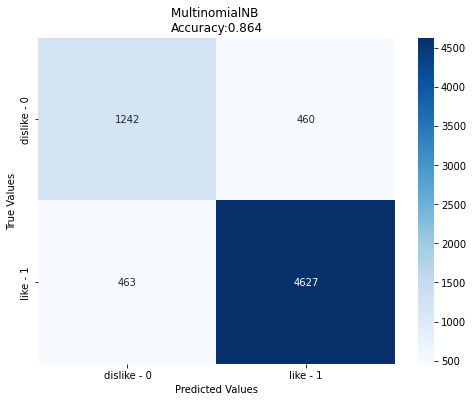

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('MultinomialNB \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = mnb.predict_proba(x_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.8920858737784508

In [ ]:
from sklearn.metrics import roc_curve

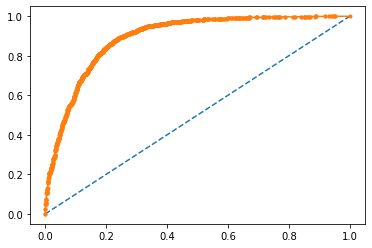

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

Model dự đoán khá tốt, accuracy tương đối cao.

# LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
lr.score(x_train, y_train)

0.8678697627460878

In [ ]:
lr.score(x_test, y_test)

0.8457008244994111

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1702
           1       0.93      0.86      0.89      5090

    accuracy                           0.85      6792
   macro avg       0.79      0.83      0.81      6792
weighted avg       0.86      0.85      0.85      6792



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1349,  353],
       [ 695, 4395]])

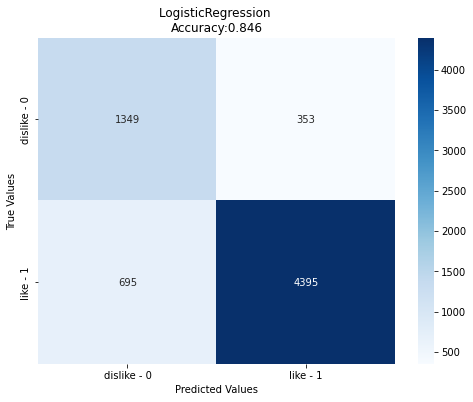

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('LogisticRegression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = lr.predict_proba(x_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.893301593641134

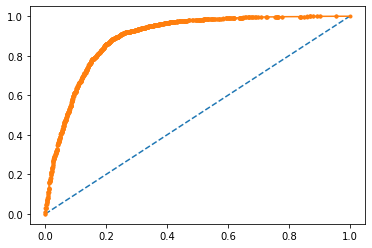

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

Model có accuracy thấp hơn một chút so với MultinomialNB nhưng dự đoán đồng đều ở cả 2 class hơn.

# RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
rf.score(x_train, y_train)

0.9975391216557294

In [ ]:
rf.score(x_test, y_test)

0.8576266195524146

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1702
           1       0.89      0.92      0.91      5090

    accuracy                           0.86      6792
   macro avg       0.82      0.79      0.80      6792
weighted avg       0.85      0.86      0.86      6792



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1137,  565],
       [ 402, 4688]])

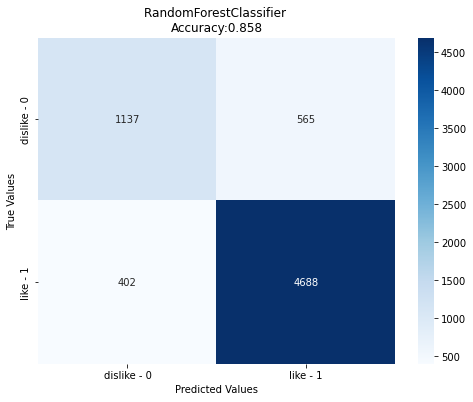

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('RandomForestClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = rf.predict_proba(x_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.8797468135257493

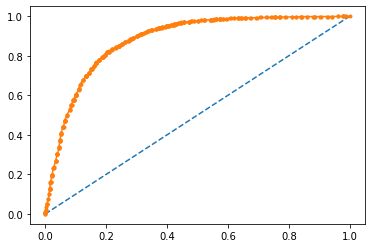

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

Model dự đoán khá tốt, accuracy tương đối cao.

Thử tuning parameter 3 thuật toán này nhưng kết quả không tốt hơn so với model gốc.

# Lựa chọn model LogisticRegression để dự đoán vì có dự đoán đồng đều ở cả 2 class, tuy accuracy có thấp hơn một chút so với 2 thuật toán còn lại.

In [ ]:
import pickle

In [ ]:
with open('food_LogisticRegression.pkl', mode = 'wb') as pkl:
  pickle.dump(lr, pkl)

In [ ]:
with open('Count_tfidf.pkl', mode = 'wb') as pkl:
  pickle.dump(vectorizer3, pkl)